The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


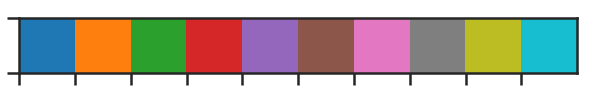

In [42]:
#from model_phantom_noise import *
from model_christos import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2

#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+90) )/360)
#p_dist = int((N * (90) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [43]:
def hemap(an, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
        #plt.gca().plot([stimon, stimon+400], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t)
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation




## Modulated circuit r1 and r2

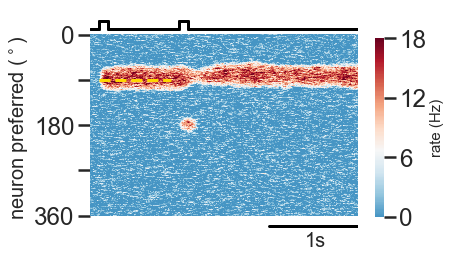

In [45]:
fee=1
fei=1
fie=1
fii=1

r1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(r1,  order=1)

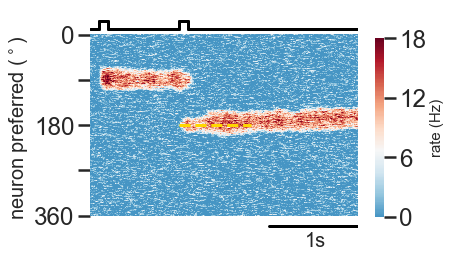

In [47]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


r2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(r2, order=2)

## Stimuli strength  
### In r2 regime, changes stim strengths to make the 1st stim the one remembered  
(I also needed to modify the plot parameters to mark the first as the target)

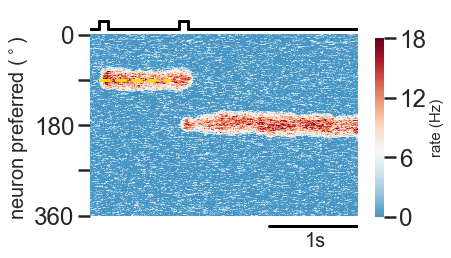

In [41]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


same_stim_strnghths= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(same_stim_strnghths, order=2)

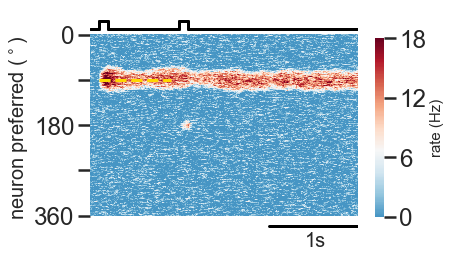

In [40]:
#### Reduce distractor strength
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


change_stim_strengths= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=14.4, stim_strengthI1=0.,
           stim_strengthE2=7., stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(change_stim_strengths, order=2)

In [48]:
from model_david import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
##plotear el hetamap (se necesiat el RE)

def simulation_heatmap(RE, time_simulation, order2, angle_separation, target_onset, distractor_onset, pres_period):
    pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap=pal_cyan, vmin=0, vmax=45,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 15, 30, 45], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (180+angle_separation/2) * (dims[0]/360)
    p_dist = (180-angle_separation/2) * (dims[0]/360) 

    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    diston = distractor_onset/2
    distoff = (distractor_onset + pres_period) / 2


    plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='gold', linewidth=3) 
    #plt.gca().plot([diston, diston+400], [p_dist, p_dist], ls='--', color ='red', linewidth=1) 

    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)

    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)

    ###

    ##line stims  
    if order2==False:
        s1on=stimon
        s1off=stimoff
        s2on=diston
        s2off=distoff
    else:
        s1on=diston
        s1off=distoff
        s2on=stimon
        s2off=stimoff

    plt.plot([0, s1on], [-15, -15], 'k-', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], 'k-', linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1off, s2on], [-15, -15], 'k-', linewidth=2)
    plt.plot([s2on, s2on], [-15, -40], 'k-', linewidth=2)
    plt.plot([s2on, s2off], [-40, -40], 'k-', linewidth=2)
    plt.plot([s2off, s2off], [-15, -40], 'k-', linewidth=2)
    plt.plot([s2off, dims[1]], [-15, -15], 'k-', linewidth=2)

    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    plt.show()



## Background input modulation --> o2

In [65]:
time_simulation=3000
presentation_period = 250
angle_separation=80

target_onset = 700
target_offset = target_onset + presentation_period
distractor_onset = 300
distractor_offset = distractor_onset + presentation_period
order2 = distractor_onset<target_onset ##boolean


background_o2 = model1(totalTime=time_simulation,  presentation_period=presentation_period,  angle_separation=angle_separation, 
           targ_onset=target_onset, dist_onset=distractor_onset,  order_2=order2,
           tauE=60, tauI=10, tauf=7000, taud=80, 
           I0I=0.4, U=0.4,
           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1,
           sigE=2.8, sigI=2.2,
           kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=50,
           N=512, plot_connectivity=False, plot_dyniamic=False, plot_heatmap=False, plot_fit=False, save_RE=True)



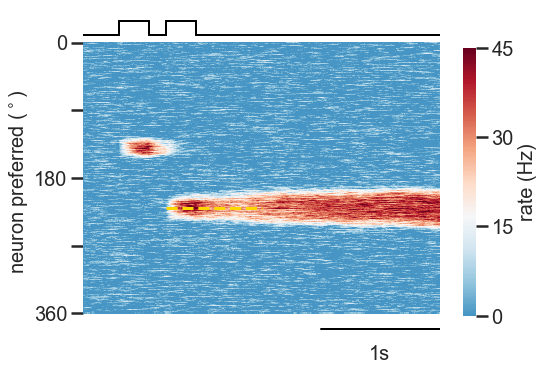

In [66]:
simulation_heatmap(RE=background_o2[1], time_simulation=time_simulation, order2=order2, 
      angle_separation=angle_separation, target_onset=target_onset, 
      distractor_onset =distractor_onset, pres_period=presentation_period)

## Background input modulation --> o1


In [63]:
time_simulation=3000
presentation_period = 250
angle_separation=-80

target_onset = 300
target_offset = target_onset + presentation_period
distractor_onset = 700
distractor_offset = distractor_onset + presentation_period
order2 = distractor_onset<target_onset ##boolean


background_o1 = model1(totalTime=time_simulation,  presentation_period=presentation_period,  angle_separation=angle_separation, 
           targ_onset=target_onset, dist_onset=distractor_onset,  order_2=order2,
           tauE=60, tauI=10, tauf=7000, taud=80, 
           I0I=0.4, U=0.4,
           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1,
           sigE=2.8, sigI=2.2,
           kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=50,
           N=512, plot_connectivity=False, plot_dyniamic=False, plot_heatmap=False, plot_fit=False, save_RE=True)

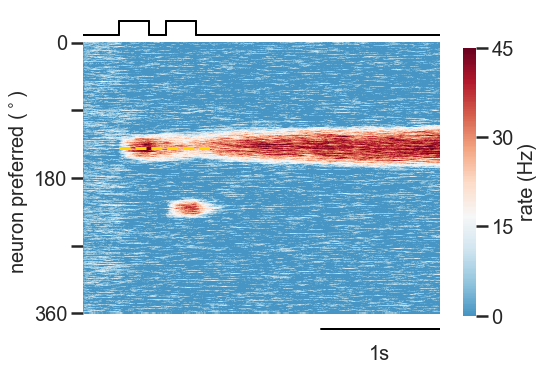

In [64]:
simulation_heatmap(RE=background_o1[1], time_simulation=time_simulation, order2=order2, 
      angle_separation=angle_separation, target_onset=target_onset, 
      distractor_onset =distractor_onset, pres_period=presentation_period)

In [ ]:
sns.set_context("paper")
background_o1 = model1(totalTime=time_simulation,  presentation_period=presentation_period,  angle_separation=angle_separation, 
           targ_onset=target_onset, dist_onset=distractor_onset,  order_2=order2,
           tauE=60, tauI=10, tauf=7000, taud=80, 
           I0I=0.4, U=0.4,
           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1,
           sigE=2.8, sigI=2.2,
           kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=50,
           N=512, plot_connectivity=False, plot_dyniamic=False, plot_heatmap=False, plot_fit=False, save_RE=True)